<a href="https://colab.research.google.com/github/YLysov0017/Pproject/blob/master/task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Вариант 11

## Задача:
  Управление качеством продукции на производственном предприятии
## Суть задачи:
Система управления должна контролировать качество продукции на каждом этапе
производства и принимать решения о необходимости корректировок в процессе, чтобы
минимизировать количество бракованных изделий. Цель — поддерживать высокое качество
продукции и сократить затраты на возвраты и переработку.
## Условия:
1. Если уровень дефектов высок и скорость производства высокая, необходимо снизить
скорость или провести дополнительный контроль качества.
2. Если уровень дефектов низкий и скорость производства низкая, можно увеличить скорость
производства.
3. Если уровень дефектов средний, необходимо провести дополнительную проверку, чтобы
выявить причины.
4. Если уровень дефектов очень высокий, следует остановить производство для анализа и
корректировок.


Входные переменные:
1. Уровень дефектов (defect rate):
• Низкий (Low)
• Средний (Medium)
• Высокий (High)
• Очень высокий (Very High)
2. Скорость производства (production speed):
• Низкая (Low)
• Средняя (Medium)
• Высокая (High)


Выходная переменная:
1. Корректировка процесса (process adjustment):
• Уменьшить скорость (Reduce Speed)
• Поддерживать скорость (Maintain Speed)
• Увеличить скорость (Increase Speed)
• Остановить производство (Stop Production)


Пример правил:
1. Если уровень дефектов очень высокий и скорость производства высокая, необходимо
остановить производство.
2. Если уровень дефектов высокий и скорость производства высокая, следует уменьшить
скорость.
3. Если уровень дефектов низкий и скорость производства низкая, можно увеличить скорость.
4. Если уровень дефектов средний, необходимо поддерживать текущую скорость и провести
дополнительный контроль.

In [32]:
!pip install scikit-fuzzy

In [33]:
import numpy as np
import skfuzzy as fuz
from skfuzzy import control as ctrl

In [34]:
defect_rate = ctrl.Antecedent( np.arange(0, 101, 1), "Уровень дефектов" )
production_speed = ctrl.Antecedent( np.arange(0, 101, 1), "Скорость производства" )
proc_adjustment = ctrl.Consequent( np.arange(0, 101, 1), "Корректировка процесса" )

In [35]:
# Треугольная функция
defect_rate['Низкий'] = fuz.trimf(defect_rate.universe, [0, 0, 15])
defect_rate['Средний'] = fuz.trimf(defect_rate.universe, [10, 20, 30])
defect_rate['Высокий'] = fuz.trimf(defect_rate.universe, [25, 37.5, 50])
defect_rate['Очень высокий'] = fuz.trimf(defect_rate.universe, [45, 100, 100])

production_speed['Низкая'] = fuz.trimf(production_speed.universe, [0, 0, 50])
production_speed['Средняя'] = fuz.trimf(production_speed.universe, [0, 50, 100])
production_speed['Высокая'] = fuz.trimf(production_speed.universe, [50, 100, 100])

proc_adjustment['Увеличить скорость'] = fuz.trimf(proc_adjustment.universe, [0, 0, 25])
proc_adjustment['Поддерживать скорость'] = fuz.trimf(proc_adjustment.universe, [20, 30, 40])
proc_adjustment['Уменьшить скорость'] = fuz.trimf(proc_adjustment.universe, [35, 52.5, 70])
proc_adjustment['Остановить производство'] = fuz.trimf(proc_adjustment.universe, [65, 100, 100])

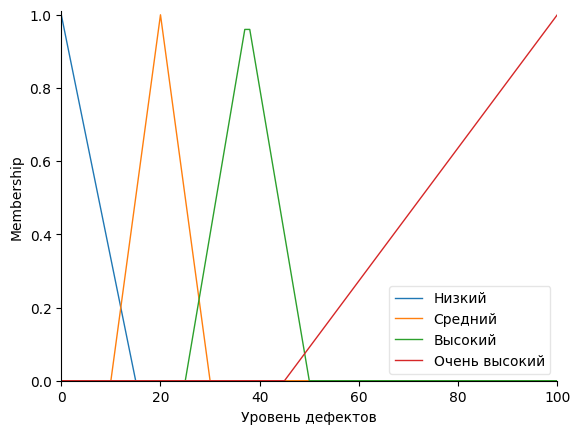

In [36]:
defect_rate.view()

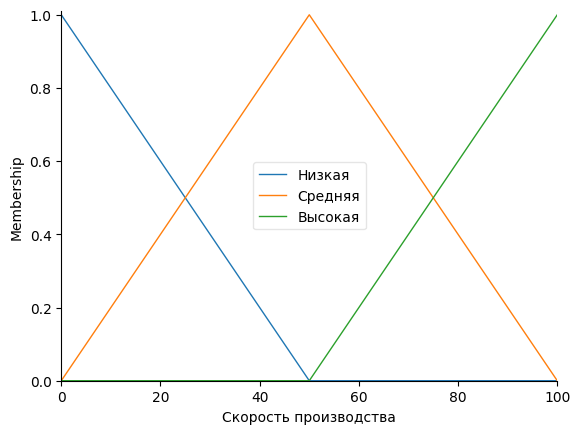

In [37]:
production_speed.view()

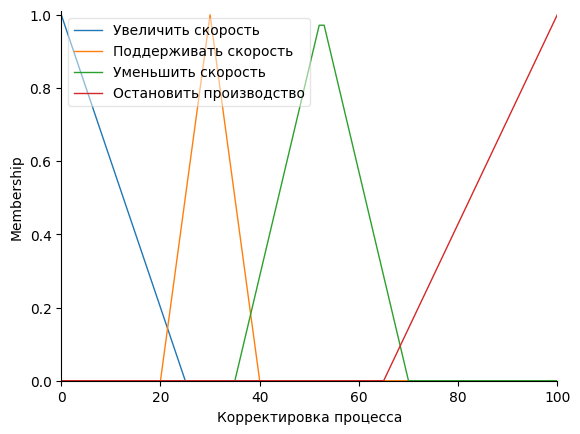

In [38]:
proc_adjustment.view()

In [39]:
rule1 = ctrl.Rule(defect_rate['Очень высокий'] & production_speed['Высокая'], proc_adjustment['Остановить производство'])
rule2 = ctrl.Rule(defect_rate['Высокий'] & production_speed['Высокая'], proc_adjustment['Уменьшить скорость'])
rule3 = ctrl.Rule(defect_rate['Низкий'] & production_speed['Низкая'], proc_adjustment['Увеличить скорость'])
rule4 = ctrl.Rule(defect_rate['Средний'] & production_speed['Высокая'], proc_adjustment['Поддерживать скорость'])
rule5 = ctrl.Rule(defect_rate['Средний'] & production_speed['Низкая'], proc_adjustment['Поддерживать скорость'])
rule6 = ctrl.Rule(defect_rate['Средний'] & production_speed['Средняя'], proc_adjustment['Поддерживать скорость'])
rule7 = ctrl.Rule(defect_rate['Высокий'] & production_speed['Низкая'], proc_adjustment['Остановить производство'])
rule8 = ctrl.Rule(defect_rate['Низкий'] & production_speed['Высокая'], proc_adjustment['Поддерживать скорость'])

In [53]:
prod_ctrl = ctrl.ControlSystem( [rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8] )
production = ctrl.ControlSystemSimulation(prod_ctrl)

In [54]:
production.input["Скорость производства"] = 50
production.input["Уровень дефектов"] = 10

In [55]:
production.compute()
production.output

{}

In [49]:
production.compute()
print(f"Контроль: { production.output['Корректировка процесса']:.2f} %")


KeyError: 'Корректировка процесса'

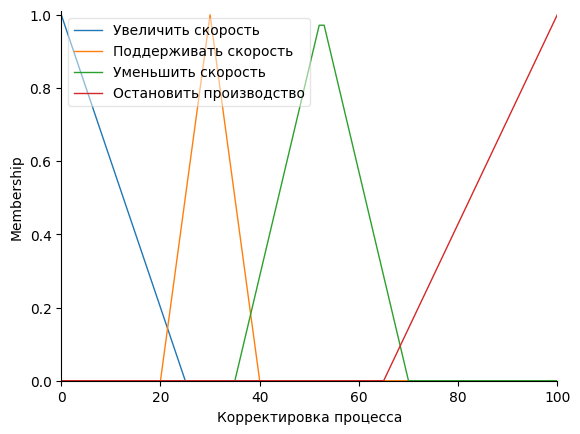

In [50]:
proc_adjustment.view(sim=production)